## Forecasting_Model based methods

#### Rquired Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

#### Dataset importing

In [97]:
data_airlines = pd.read_excel("F://RStudio//excelR//assignments//Assignment 18 forecasting//Airlines+Data.xlsx")

###### Understanding the data

In [98]:
data_airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [99]:
data_airlines.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


#### EDA

In [100]:
data_airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [101]:
data_airlines.shape

(96, 2)

In [102]:
data_airlines.columns

Index(['Month', 'Passengers'], dtype='object')

In [103]:
data_airlines.nunique()

Month         96
Passengers    80
dtype: int64

In [104]:
data_airlines.nunique()

Month         96
Passengers    80
dtype: int64

<AxesSubplot:>

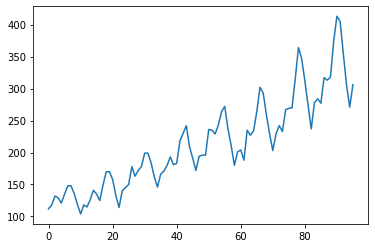

In [105]:
data_airlines.Passengers.plot()

In [106]:
data_airlines['Month'].unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [107]:
data_airlines['Passengers'].unique()

array([112, 118, 132, 129, 121, 135, 148, 136, 119, 104, 115, 126, 141,
       125, 149, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 199,
       184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
       191, 194, 196, 236, 235, 229, 243, 264, 272, 237, 211, 201, 204,
       188, 227, 234, 302, 293, 259, 203, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355,
       306, 271], dtype=int64)

###### Cleaning The Data

In [108]:
data_airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

###### Relationship Analysis

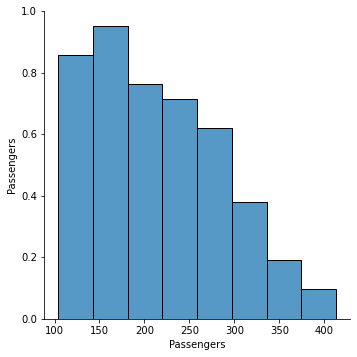

In [109]:
sns.pairplot(data_airlines, height = 5)

#### Univariate Analysis

C:\Users\User\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

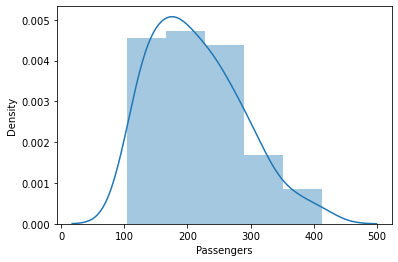

In [110]:
sns.distplot(data_airlines['Passengers'], bins=5)

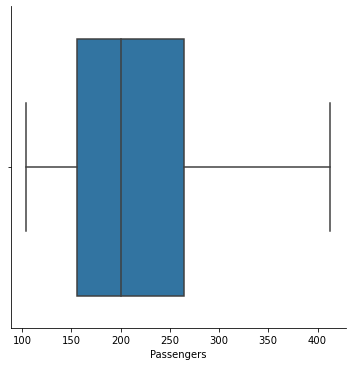

In [111]:
sns.catplot(x= 'Passengers',kind ='box', data=data_airlines)

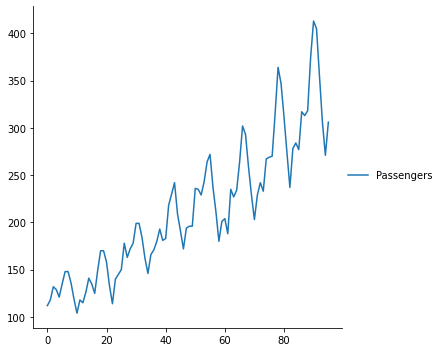

In [112]:
sns.relplot(data=data_airlines, kind="line")

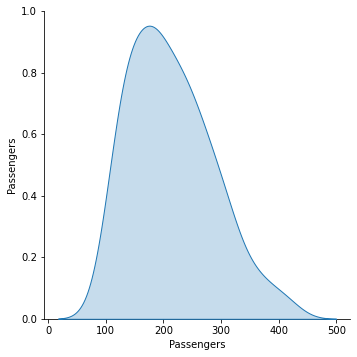

In [113]:
g = sns.pairplot(data_airlines, diag_kind="kde", height = 5)
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [114]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

data_airlines["month"] = data_airlines.Month.dt.strftime("%b") # month extraction
data_airlines["year"] = data_airlines.Month.dt.strftime("%Y") # year extraction
data_airlines.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [115]:
heatmap_year_month = pd.pivot_table(data=data_airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_year_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

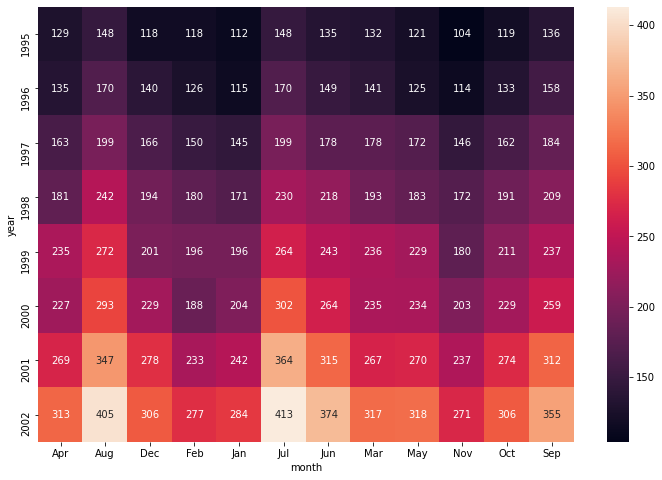

In [116]:
plt.figure(figsize=(12,8))
heatmap_year_month = pd.pivot_table(data=data_airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_year_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

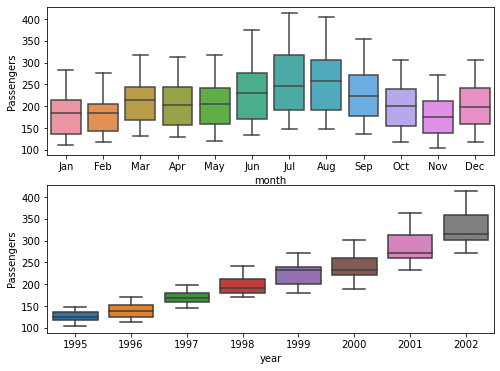

In [117]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data_airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data_airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

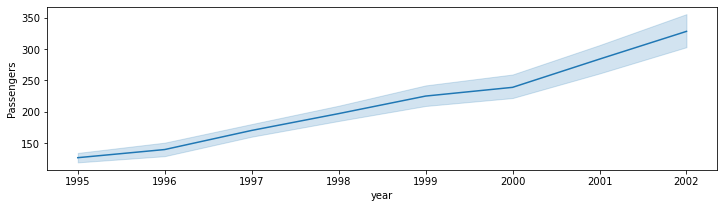

In [118]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data_airlines)

In [119]:
data_airlines.head(2)

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995


In [120]:
import datetime
data_airlines['m'] = range(1,(data_airlines.shape[0]+1))
data_airlines['m_square'] = np.power(data_airlines['m'],2)
data_airlines['log_Passengers']=np.log(data_airlines['Passengers'])
data_airlines.head()

,Month,Passengers,month,year,m,m_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791


In [121]:
ddf = pd.get_dummies(data_airlines.iloc[:,2],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [122]:
fdf = pd.concat([data_airlines,ddf],axis=1)
fdf.head(2)

,Month,Passengers,month,year,m,m_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0


In [123]:
col = ['Month', 'Passengers', 'month', 'm', 'm_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = pd.DataFrame(fdf,columns=col)
df1.tail()

,Month,Passengers,month,m,m_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
91,2002-08-01,405,Aug,92,8464,2002,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,93,8649,2002,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,94,8836,2002,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,95,9025,2002,5.602119,0,0,0,0,0,0,0,0,0,0,1,0
95,2002-12-01,306,Dec,96,9216,2002,5.723585,0,0,0,0,0,0,0,0,0,0,0,1


## Splitting Data

In [124]:
Train = df1.head(86)
Test = df1.tail(10)

##### Linear Model

In [125]:
linear_model = smf.ols('Passengers~m',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['m'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.6431497277825

##### Exponential

In [126]:
Exp = smf.ols('log_Passengers~m',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['m'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

49.903123347893114

##### Quadratic

In [127]:
Quad = smf.ols('Passengers~m+m_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["m","m_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.9143635785296

##### Additive seasonality 

In [128]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

136.7901043681932

##### Additive Seasonality Quadratic 

In [129]:
add_sea_Quad = smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','m','m_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

29.104549899225812

##### Multiplicative Seasonality

In [130]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

144.3849354946141

##### Multiplicative Additive Seasonality 

In [131]:
Mul_Add_sea = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.264958330315716

###### Compare the results 

In [132]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.264958
4,rmse_add_sea_quad,29.104550
1,rmse_Exp,49.903123
2,rmse_Quad,53.914364
0,rmse_linear,58.643150
3,rmse_add_sea,136.790104
5,rmse_Mult_sea,144.384935


### Predicting for New Time Period (Month-wise Forecast)

In [133]:
predict_data = pd.read_excel("C:/Users/User/Downloads/Jupyter files/My Jupyter practice/Forecasting-main/Predict+Airlines.xlsx")
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,m,m_square
0,2003-01-01,1,0,0,0,0,0,0,0,0,0,0,0,97,9409
1,2003-02-01,0,1,0,0,0,0,0,0,0,0,0,0,98,9604
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236


In [134]:
#Build the model on entire data set
Mul_Add_sea = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_new = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

0     5.768161
1     5.778685
2     5.925981
3     5.890249
4     5.880530
5     5.998892
6     6.106155
7     6.106531
8     5.999368
9     5.871888
10    5.740154
11    5.878855
dtype: float64

In [135]:
predict_data["forecasted_Passengers"] = pd.Series(np.exp(pred_new))
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,m,m_square,forecasted_Passengers
0,2003-01-01,1,0,0,0,0,0,0,0,0,0,0,0,97,9409,319.948678
1,2003-02-01,0,1,0,0,0,0,0,0,0,0,0,0,98,9604,323.333773
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801,374.645618
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000,361.495323
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201,357.999053
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404,402.982116
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609,448.610630
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816,448.779076
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025,403.173775
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236,354.918283


<Figure size 864x216 with 0 Axes>

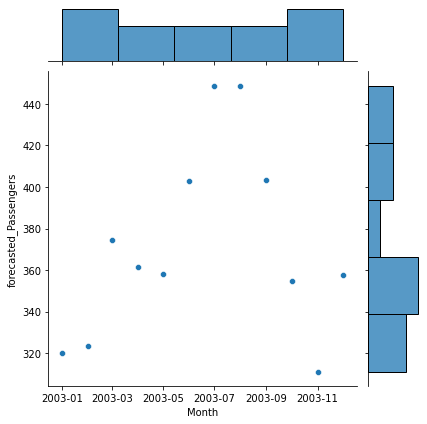

In [154]:
plt.figure(figsize=(12,3))
sns.jointplot(x="Month",y="forecasted_Passengers",data=predict_data)

<AxesSubplot:xlabel='Month', ylabel='forecasted_Passengers'>

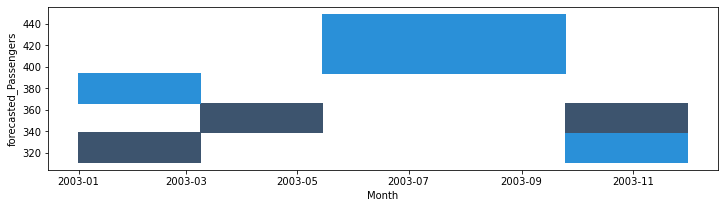

In [155]:
plt.figure(figsize=(12,3))
sns.histplot(x="Month",y="forecasted_Passengers",data=predict_data)

<AxesSubplot:xlabel='Month', ylabel='forecasted_Passengers'>

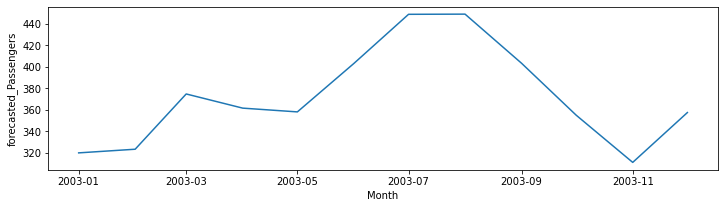

In [156]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="forecasted_Passengers",data=predict_data)

#### RESULT :

•	We have explored all the possible forecasting techniques.

•	We have built our final model from HWE Multiplicative Seasonality and Additive Trend.

In Airlines Dataset we forecasted using Model Based Method and compared RMSE value for each model.